<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(1_6)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.6_n20.csv',
 'data_multi_delta_1.6_n30.csv',
 'data_multi_delta_1.6_n60.csv',
 'data_multi_delta_1.6_n120.csv',
 'data_multi_delta_1.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,79.672151,91.361093,-50.389129,130.644115,174.321743,-43.677628
1,0.0,1.0,73.105653,71.852852,-10.257099,144.701406,151.258004,-6.556598
2,0.0,2.0,34.381339,50.578202,8.042747,103.002288,95.833761,7.168527
3,0.0,3.0,56.634531,79.811183,-44.971568,101.474146,142.300205,-40.826059
4,0.0,4.0,34.598113,83.564887,3.690500,131.853500,124.391201,7.462299
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,61.223821,33.282863,-8.841809,95.664875,102.434664,-6.769789
59996,999.0,56.0,93.997315,66.674007,-7.564325,163.106996,173.236184,-10.129188
59997,999.0,57.0,76.301093,71.882379,-47.486792,110.696680,160.350230,-49.653550
59998,999.0,58.0,92.624849,98.592832,27.159063,228.376744,206.607232,21.769512


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,79.672151,91.361093,-50.389129,130.644115,174.321743,-43.677628
1,0.0,1.0,73.105653,71.852852,-10.257099,144.701406,151.258004,-6.556598
2,0.0,2.0,34.381339,50.578202,8.042747,103.002288,95.833761,7.168527
3,0.0,3.0,56.634531,79.811183,-44.971568,101.474146,142.300205,-40.826059
4,0.0,4.0,34.598113,83.564887,3.690500,131.853500,124.391201,7.462299
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,61.223821,33.282863,-8.841809,95.664875,102.434664,-6.769789
59996,999.0,56.0,93.997315,66.674007,-7.564325,163.106996,173.236184,-10.129188
59997,999.0,57.0,76.301093,71.882379,-47.486792,110.696680,160.350230,-49.653550
59998,999.0,58.0,92.624849,98.592832,27.159063,228.376744,206.607232,21.769512


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    79.672151  91.361093 -50.389129  130.644115  174.321743   
      1.0    73.105653  71.852852 -10.257099  144.701406  151.258004   
      2.0    34.381339  50.578202   8.042747  103.002288   95.833761   
      3.0    56.634531  79.811183 -44.971568  101.474146  142.300205   
      4.0    34.598113  83.564887   3.690500  131.853500  124.391201   
...                ...        ...        ...         ...         ...   
999.0 55.0   61.223821  33.282863  -8.841809   95.664875  102.434664   
      56.0   93.997315  66.674007  -7.564325  163.106996  173.236184   
      57.0   76.301093  71.882379 -47.486792  110.696680  160.350230   
      58.0   92.624849  98.592832  27.159063  228.376744  206.607232   
      59.0   27.545882  70.976362 -25.602628   82.919616  108.209857   

                 e_hat  
rep   index             
0.0   0.0   -43.677628  
      1.0    -6.556598  
      2.0     7.168527  
      3.0   -40.826059  
      4.0     7.462299  
...                ...  
999.0 55.0   -6.769789  
      56.0  -10.129188  
      57.0  -49.653550  
      58.0   21.769512  
      59.0  -25.290242  

[60000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    79.672151  91.361093 -50.389129  130.644115  174.321743   
      1.0    73.105653  71.852852 -10.257099  144.701406  151.258004   
      2.0    34.381339  50.578202   8.042747  103.002288   95.833761   
      3.0    56.634531  79.811183 -44.971568  101.474146  142.300205   
      4.0    34.598113  83.564887   3.690500  131.853500  124.391201   
...                ...        ...        ...         ...         ...   
999.0 55.0   61.223821  33.282863  -8.841809   95.664875  102.434664   
      56.0   93.997315  66.674007  -7.564325  163.106996  173.236184   
      57.0   76.301093  71.882379 -47.486792  110.696680  160.350230   
      58.0   92.624849  98.592832  27.159063  228.376744  206.607232   
      59.0   27.545882  70.976362 -25.602628   82.919616  108.209857   

                 e_hat  
rep   index             
0.0   0.0   -43.677628  
      1.0    -6.556598  
      2.0     7.168527  
      3.0   -40.826059  
      4.0     7.462299  
...                ...  
999.0 55.0   -6.769789  
      56.0  -10.129188  
      57.0  -49.653550  
      58.0   21.769512  
      59.0  -25.290242  

[60000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,79.672151,91.361093,-50.389129,130.644115,174.321743,-43.677628
1,0.0,1.0,73.105653,71.852852,-10.257099,144.701406,151.258004,-6.556598
2,0.0,2.0,34.381339,50.578202,8.042747,103.002288,95.833761,7.168527
3,0.0,3.0,56.634531,79.811183,-44.971568,101.474146,142.300205,-40.826059
4,0.0,4.0,34.598113,83.564887,3.690500,131.853500,124.391201,7.462299
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,61.223821,33.282863,-8.841809,95.664875,102.434664,-6.769789
59996,999.0,56.0,93.997315,66.674007,-7.564325,163.106996,173.236184,-10.129188
59997,999.0,57.0,76.301093,71.882379,-47.486792,110.696680,160.350230,-49.653550
59998,999.0,58.0,92.624849,98.592832,27.159063,228.376744,206.607232,21.769512


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    79.672151  91.361093 -50.389129  130.644115  174.321743   
      1.0    73.105653  71.852852 -10.257099  144.701406  151.258004   
      2.0    34.381339  50.578202   8.042747  103.002288   95.833761   
      3.0    56.634531  79.811183 -44.971568  101.474146  142.300205   
      4.0    34.598113  83.564887   3.690500  131.853500  124.391201   
...                ...        ...        ...         ...         ...   
999.0 55.0   61.223821  33.282863  -8.841809   95.664875  102.434664   
      56.0   93.997315  66.674007  -7.564325  163.106996  173.236184   
      57.0   76.301093  71.882379 -47.486792  110.696680  160.350230   
      58.0   92.624849  98.592832  27.159063  228.376744  206.607232   
      59.0   27.545882  70.976362 -25.602628   82.919616  108.209857   

                 e_hat  
rep   index             
0.0   0.0   -43.677628  
      1.0    -6.556598  
      2.0     7.168527  
      3.0   -40.826059  
      4.0     7.462299  
...                ...  
999.0 55.0   -6.769789  
      56.0  -10.129188  
      57.0  -49.653550  
      58.0   21.769512  
      59.0  -25.290242  

[60000 rows x 6 columns]

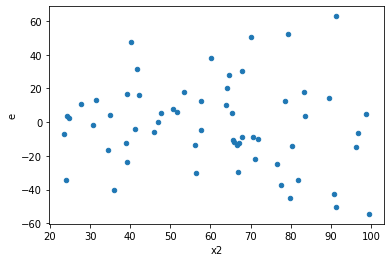

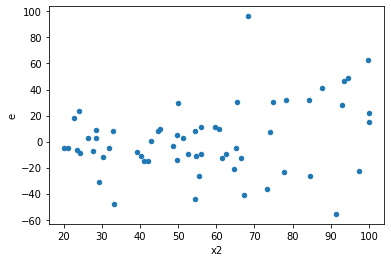

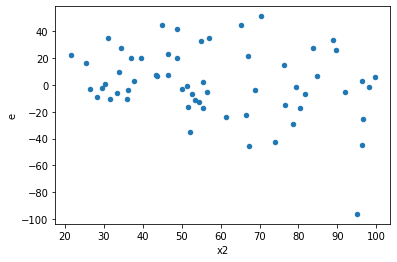

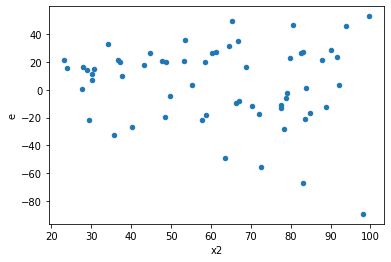

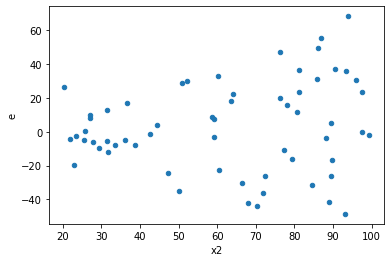

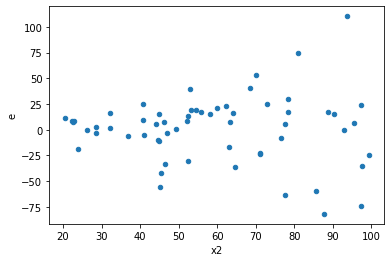

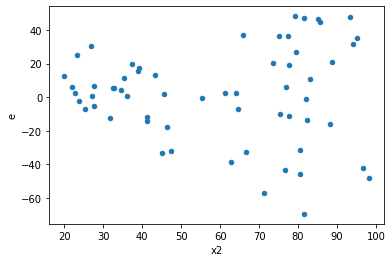

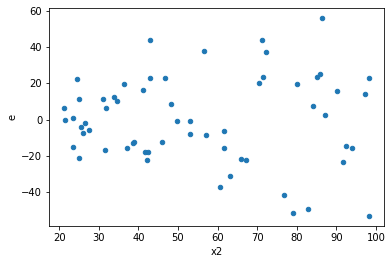

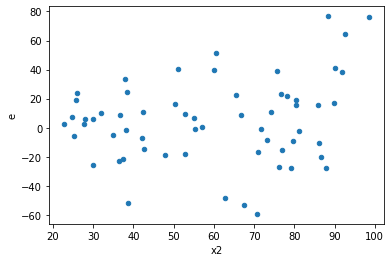

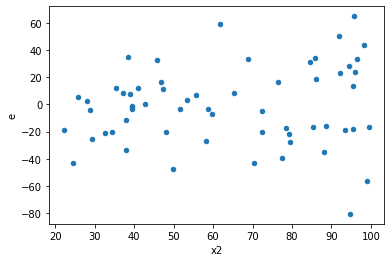

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,22.0,22.0,7883.610743153664,22921.31487455523,358.34594287062106,1041.8779488434195,2.9074640569311097,0.015515265620873908,0.992242367189563,0.007757632810436954,Reject001=1 : Homoscedasticity
1.0,22.0,22.0,4939.087470839458,28583.739985033088,224.50397594724808,1299.260908410595,5.787251218730681,0.00011836165963563516,0.9999408191701822,5.918082981781758e-05,Reject001=0 : Heteroscedasticity
2.0,22.0,22.0,5472.4316578494945,23993.46781120033,248.7468935386134,1090.6121732363788,4.384425299635275,0.0010036782886702067,0.9994981608556649,0.0005018391443351033,Reject001=0 : Heteroscedasticity
3.0,22.0,22.0,7517.209370547875,26344.07247122779,341.69133502490337,1197.4578396012632,3.5045016272185814,0.004785458595368386,0.9976072707023158,0.002392729297684193,Reject001=0 : Heteroscedasticity
4.0,22.0,22.0,4992.260102377938,19310.902325223622,226.92091374445172,877.7682875101647,3.8681683103861833,0.0024510701705975357,0.9987744649147012,0.0012255350852987679,Reject001=0 : Heteroscedasticity
5.0,22.0,22.0,7112.559410016174,48977.52760091462,323.2981550007352,2226.251254587028,6.886062354986113,2.810705177425099e-05,0.9999859464741129,1.4053525887125495e-05,Reject001=0 : Heteroscedasticity
6.0,22.0,22.0,4068.246667829113,29481.34990644014,184.9203030831415,1340.0613593836426,7.246696750119112,1.819127698188261e-05,0.9999909043615091,9.095638490941305e-06,Reject001=0 : Heteroscedasticity
7.0,22.0,22.0,4004.4575663555293,21310.376037787322,182.02079847070587,968.6534562630601,5.32166359230071,0.00023073627349079473,0.9998846318632546,0.00011536813674539736,Reject001=0 : Heteroscedasticity
8.0,22.0,22.0,9922.73466494619,15629.400837795945,451.03339386119046,710.4273108089066,1.575110225713236,0.2941662890542458,0.8529168554728771,0.1470831445271229,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,22.0,7883.610743153664,22921.31487455523,358.34594287062106,1041.8779488434195,2.9074640569311097,0.015515265620873908,Reject001=1 : Homoscedasticity
1.0,22.0,22.0,4939.087470839458,28583.739985033088,224.50397594724808,1299.260908410595,5.787251218730681,0.00011836165963563516,Reject001=0 : Heteroscedasticity
2.0,22.0,22.0,5472.4316578494945,23993.46781120033,248.7468935386134,1090.6121732363788,4.384425299635275,0.0010036782886702067,Reject001=0 : Heteroscedasticity
3.0,22.0,22.0,7517.209370547875,26344.07247122779,341.69133502490337,1197.4578396012632,3.5045016272185814,0.004785458595368386,Reject001=0 : Heteroscedasticity
4.0,22.0,22.0,4992.260102377938,19310.902325223622,226.92091374445172,877.7682875101647,3.8681683103861833,0.0024510701705975357,Reject001=0 : Heteroscedasticity
5.0,22.0,22.0,7112.559410016174,48977.52760091462,323.2981550007352,2226.251254587028,6.886062354986113,2.810705177425099e-05,Reject001=0 : Heteroscedasticity
6.0,22.0,22.0,4068.246667829113,29481.34990644014,184.9203030831415,1340.0613593836426,7.246696750119112,1.819127698188261e-05,Reject001=0 : Heteroscedasticity
7.0,22.0,22.0,4004.4575663555293,21310.376037787322,182.02079847070587,968.6534562630601,5.32166359230071,0.00023073627349079473,Reject001=0 : Heteroscedasticity
8.0,22.0,22.0,9922.73466494619,15629.400837795945,451.03339386119046,710.4273108089066,1.575110225713236,0.2941662890542458,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    639
Reject001=1 : Homoscedasticity      361
Name: Result_test, dtype: int64